**Write a report introducing the project in terms of the process you will follow, , explaining the hypothesis being tested or project goal**


**Introduction:**

The goal of this project is to predict medical insurance charges using machine learning techniques. With the increasing cost of healthcare, the prediction of insurance charges can help individuals and insurance companies make informed decisions regarding healthcare expenses. In this report, I will outline the process we will follow to achieve our goal.

**Project Goal:**

My project aims to build a model that can predict the medical insurance charges for individuals based on their demographic and medical information. I will use machine learning algorithms to analyze the data and make predictions. My goal is to achieve high accuracy in our predictions and develop a model that can be used to assist insurance companies and individuals in making informed decisions about healthcare expenses.

**Hypothesis:**

My hypothesis is that I can develop a machine learning model that can accurately predict medical insurance charges for individuals based on their demographic and medical information. I believe that factors such as age, gender, BMI, smoking status, and region will be strong predictors of medical insurance charges. By analyzing these factors and developing a model that incorporates them, I can achieve high accuracy in our predictions.



**Discuss your data- if structured, semi structured or unstructured**

I am using a CSV file that I downloaded from Kaggle. Based on the file format I am using, your data is structured. It is organized into rows and columns in the file, making it easy to analyze and manipulate. 




In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [7]:
df = pd.read_csv('insurance.csv')

In [4]:
#Checking what i have inside my data
df.head()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
#Checking the shape of the data
df.shape

(1338, 8)

So the dataset has 1338 rows and 8 columns

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


I mostly have categorical features therefore i have to encode the features.

The categorical type variables are:
smoker
region
sex

Now here is where **data preprocessing** comes in.

In [10]:
#Checking if i have null values in the dataset
df.isnull().sum()

index       0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
#Checking the basic statistical values for all the numerical data that i have
df.describe()

,index,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,668.500000,39.207025,30.663397,1.094918,13270.422265
std,386.391641,14.049960,6.098187,1.205493,12110.011237
min,0.000000,18.000000,15.960000,0.000000,1121.873900
25%,334.250000,27.000000,26.296250,0.000000,4740.287150
50%,668.500000,39.000000,30.400000,1.000000,9382.033000
75%,1002.750000,51.000000,34.693750,2.000000,16639.912515
max,1337.000000,64.000000,53.130000,5.000000,63770.428010


<ipython-input-12-a19172058a79>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


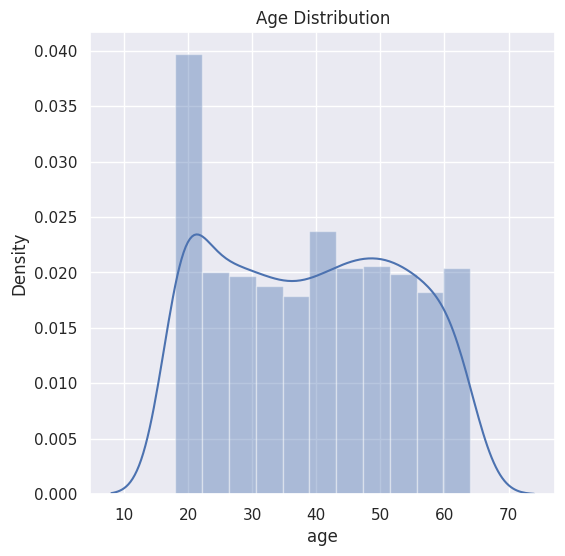

In [12]:
#checking the age distribution that i have in this dataset
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title("Age Distribution")
plt.show()


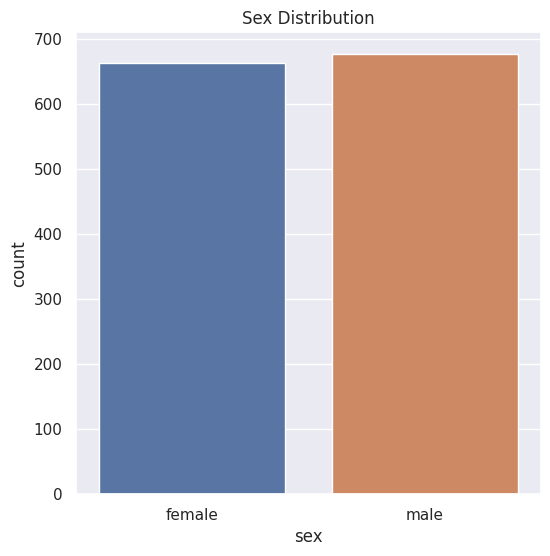

In [13]:
#Understanding information about males and females in the data
plt.figure(figsize=(6,6))
sns.countplot(x="sex",data=df)
plt.title("Sex Distribution")
plt.show()


In [14]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

Ploting the bmi with the distplot

<ipython-input-15-6ab3ebdc03b5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])


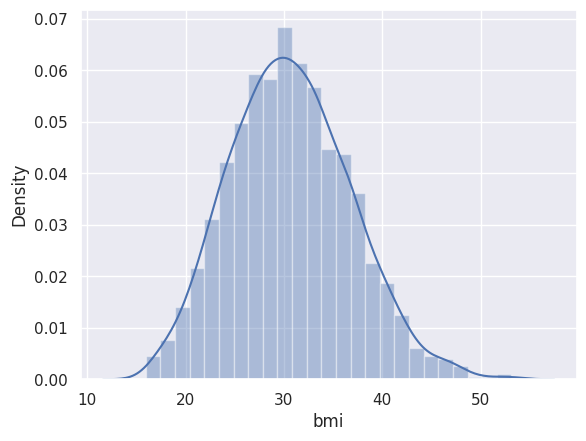

In [15]:
sns.distplot(df['bmi'])
plt.show()

Understanding the distribution about region

In [17]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

**Data Encoding of categorical features**

In [18]:
df.replace({'sex':{'male':0, 'female': 1}},inplace=True)
df.replace({'smoker':{'yes':0, 'no': 1}},inplace=True)
df.replace({'region':{'southeast':0, 'southwest': 1, 'northeast': 2,'northwest': 3}},inplace=True)

In [20]:
x = df.drop(columns="charges", axis=1)
y = df['charges']

In [21]:
x

,index,age,sex,bmi,children,smoker,region
0,0,19,1,27.900,0,0,1
1,1,18,0,33.770,1,1,0
2,2,28,0,33.000,3,1,0
3,3,33,0,22.705,0,1,3
4,4,32,0,28.880,0,1,3
...,...,...,...,...,...,...,...
1333,1333,50,0,30.970,3,1,3
1334,1334,18,1,31.920,0,1,2
1335,1335,18,1,36.850,0,1,0
1336,1336,21,1,25.800,0,1,1


In [22]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [24]:
x_train.shape

(1070, 7)

In [26]:
x_test.shape

(268, 7)

So we have 80% data for training and 20% data for testing. Now we train the model using simple **linear regression**.

In [27]:
reg = LinearRegression()

In [28]:
reg.fit(x_train,y_train)

LinearRegression()

In [29]:
training_data_prediction = reg.predict(x_train)

In [30]:
#Calculate the R^2 value for our training data
r2_train=metrics.r2_score(y_train, training_data_prediction)

In [31]:
r2_train

0.7586526137482195

In [32]:
#Checking the test data prediction
test_data_prediction = reg.predict(x_test)


In [34]:
metrics.r2_score(y_test, test_data_prediction)

0.7116165465457209

In [40]:
# Now i will test with a sample input data

sample_input_data = (30,1,22.7,0,1,0,1)
input_data_as_numpy_array = np.asarray(sample_input_data)

In [41]:
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [42]:
prediction = reg.predict(input_data_reshaped)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [43]:
print("The insurance cost is:", prediction)

The insurance cost is: [19594.13581698]
